In [1]:
import torch
from torch import nn


In [2]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#importing the data
import requests
import zipfile
from pathlib import Path

data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory exists. ')

else:
  print(f'didnot find {image_path} directory, so creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

  #downloading pizza,steak and sushi data

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading file')
    f.write(request.content)

  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('unzipping data')
    zip_ref.extractall(image_path)

didnot find data/pizza_steak_sushi directory, so creating one...
downloading file
unzipping data


# Becoming one with the data

In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza


In [5]:
#setting up train and test path
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
random image class: pizza
random image height: 512
random image weidth: 512


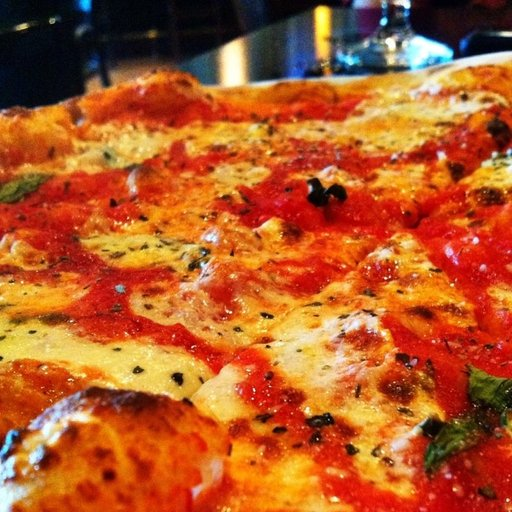

In [6]:
#visualizing images
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob('*/*/*.jpg'))

#get random image path
random_image_path=random.choice(image_path_list)

#get image class from path name
image_class=random_image_path.parent.stem

img=Image.open(random_image_path)

print(f'random image path: {random_image_path}')

print(f'random image class: {image_class}')

print(f'random image height: {img.height}')

print(f'random image weidth: {img.width}')
img


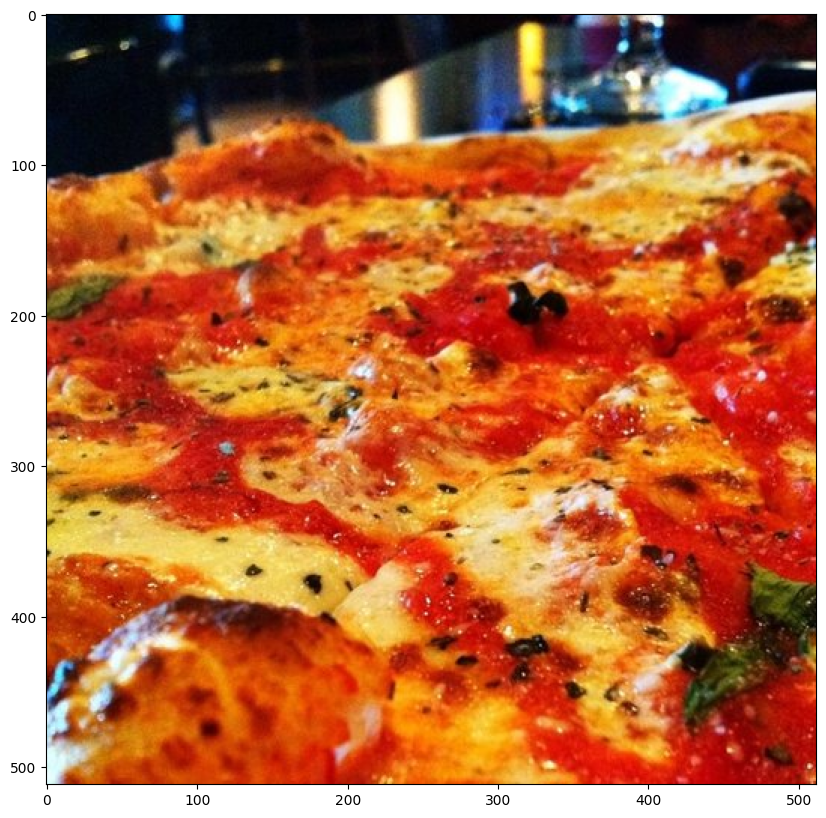

In [7]:
#we can do same using plt but first we need t convert it to numpy array
import numpy as np
import matplotlib.pyplot as plt
#turn image to array
img_as_array=np.asarray(img)
plt.figure(figsize=(10,10))
plt.imshow(img_as_array)


In [9]:
#transforming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [14]:
#write transform for image
data_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.RandomHorizontalFlip(p=0.5),
                                   transforms.ToTensor()
                                   ])

In [16]:
data_transform(img),data_transform(img).shape

(tensor([[[0.1020, 0.1922, 0.2314,  ..., 0.0118, 0.0157, 0.0157],
          [0.1216, 0.1059, 0.1137,  ..., 0.0157, 0.0157, 0.0157],
          [0.1569, 0.1255, 0.1098,  ..., 0.0941, 0.0235, 0.0157],
          ...,
          [0.6902, 0.6353, 0.4353,  ..., 0.8039, 0.8275, 0.8549],
          [0.7412, 0.6235, 0.4824,  ..., 0.7922, 0.8392, 0.8667],
          [0.8000, 0.6549, 0.6627,  ..., 0.7255, 0.7333, 0.8627]],
 
         [[0.0392, 0.0471, 0.0510,  ..., 0.0392, 0.0510, 0.0588],
          [0.0549, 0.0431, 0.0431,  ..., 0.0431, 0.0471, 0.0549],
          [0.0510, 0.0471, 0.0510,  ..., 0.1176, 0.0706, 0.0667],
          ...,
          [0.0627, 0.0627, 0.1098,  ..., 0.8118, 0.8824, 0.9529],
          [0.2353, 0.0824, 0.0667,  ..., 0.6353, 0.8510, 0.9804],
          [0.3098, 0.0980, 0.0745,  ..., 0.3176, 0.5451, 0.9412]],
 
         [[0.0392, 0.0510, 0.0588,  ..., 0.0667, 0.0745, 0.1176],
          [0.0510, 0.0392, 0.0431,  ..., 0.0784, 0.0863, 0.1137],
          [0.0627, 0.0510, 0.0588,  ...,

In [ ]:
def plot_transformed_images(image_paths,transform, n=3,seed=42):
  random.sedd(42)
  random_image_path=random.sample(image_paths,k=n)